In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest

In [2]:
# reading datasets
file1 = "C:/Users/20201954/Desktop/data/quantitative MRI.xlsx"
df1 = pd.read_excel(file1)

file2 = "C:/Users/20201954/Desktop/data/muscle force and biometrics.xlsx"
df2 = pd.read_excel(file2)

C:\Users\20201954\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# de 2 datasets combineren

# Controleer of de kolommen die we willen samenvoegen correct overeenkomen
df1['subject'] = df1['subject'].str.upper()  
df2['Participant Id'] = df2['Participant Id'].str.upper()  # Zorg ervoor dat 'Participant Id' in hoofdletters is (optioneel)

# Voeg de datasets samen op basis van de gemeenschappelijke kolom ('subject' en 'Participant Id')
merged_df = pd.merge(df1, df2, left_on='subject', right_on='Participant Id', how='inner')

# Bekijk de eerste paar rijen van de samengevoegde dataset
#print(merged_df.head())

# determining the name of the file
file_name = "C:/Users/20201954/Desktop/data/merged_data_MRI.xlsx"

# saving the excel
merged_df.to_excel(file_name)
#print('DataFrame is written to Excel File successfully.')

In [4]:
# waardes verwijderen die niet relevant zijn op dit moment en waardes missen
df = merged_df.drop(columns=['Participant Id', 'subject','subjectID', 'session', 'sessionID', 'muscle','side', 'sideID', 'volume', 'trk_leng', 'trk_ang',
                     'MRI_BMI','MS_WEIGHT','MS_HEIGHT','MS_BMI','MS_Fat','MS_LBM','MS_Water','pt_isom_k_f',	'avpt_isom_k_f','avpt_bw_isom_k_f',	
             'cov_isom_k_f','pt_isom_k_e','avpt_isom_k_e',	'avpt_bw_isom_k_e',	'cov_isom_k_e',	'aa_ratio_isom_k',	'pt_isok_k_f_t',
             'pt_bw_isok_k_f_t', 'angpt_isok_k_f_t','torq_30_isok_k_f_t','cov_isok_k_f_t','avgpow_isok_k_f_t','avpt_isok_k_f_t',
             'pt_isok_k_e_t','pt_bw_isok_k_e_t','angpt_isok_k_e_t',	'torq_30_isok_k_e_t','cov_isok_k_e_t',	'avgpow_isok_k_e_t',
             'avpt_isok__k_e_t', 'aa_ratio_isok_k_t'])
df.head()

,muscleID,trk_seed,trk_dens,dti_l1,dti_l2,dti_l3,dti_md,dti_rd,dti_fa,dti_adci,...,dix_r2star,dix_snr,dix_dbond,t2_fatfr,t2_t2w,t2_t2f,MRI_Sex,AGE,MRI_WEIGHT,MRI_HEIGHT
0,1,0.363608,1.547397,1.755076,1.296643,1.118196,1.385661,1.205056,0.218869,1.381021,...,32.360153,72.005936,11.016443,6.893448,29.766680,218.154770,1,42,99.0,193.0
1,1,0.292484,0.862784,1.674851,1.270722,1.088295,1.333043,1.176370,0.219142,1.332976,...,41.488840,55.315876,8.083123,6.579949,28.542535,188.994987,1,42,99.0,193.0
2,2,0.361483,1.201093,1.747564,1.318626,1.200244,1.422549,1.259057,0.205252,1.420225,...,35.659748,65.425865,10.307537,8.156445,30.253475,211.003571,1,42,99.0,193.0
3,2,0.356667,1.070751,1.727356,1.307701,1.196663,1.412093,1.251865,0.203801,1.413748,...,39.659378,65.230667,7.816146,7.977058,29.786484,204.876495,1,42,99.0,193.0
4,3,0.369861,1.960575,1.778001,1.367932,1.214833,1.457258,1.292251,0.195484,1.459163,...,36.733351,73.749279,10.102497,10.879514,30.962922,213.111839,1,42,99.0,193.0


In [5]:
# remove 0 values
# Verwijder rijen waar 0 of -95, -96, -97, -98, -99 in voorkomen
df_non0 = df[(df != 0).all(axis=1) & ~(df.isin([-95, -96, -97, -98, -99]).any(axis=1))]

# Toon de DataFrames
print(df_non0)
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_non0.shape}")

# Werk de originele DataFrame bij
df = df_non0

      muscleID  trk_seed  trk_dens    dti_l1    dti_l2    dti_l3    dti_md  \
0            1  0.363608  1.547397  1.755076  1.296643  1.118196  1.385661   
1            1  0.292484  0.862784  1.674851  1.270722  1.088295  1.333043   
2            2  0.361483  1.201093  1.747564  1.318626  1.200244  1.422549   
3            2  0.356667  1.070751  1.727356  1.307701  1.196663  1.412093   
4            3  0.369861  1.960575  1.778001  1.367932  1.214833  1.457258   
...        ...       ...       ...       ...       ...       ...       ...   
4615        30  0.350130  1.458320  1.987010  1.524702  1.367360  1.633937   
4616        31  0.355364  4.720841  1.677772  1.190149  1.030197  1.306104   
4617        31  0.372733  4.749018  1.811385  1.279181  1.149419  1.418036   
4618        32  0.291074  1.440242  1.840319  1.294961  1.063983  1.410382   
4619        32  0.307642  1.518577  1.965706  1.337018  1.117585  1.483786   

        dti_rd    dti_fa  dti_adci  ...  dix_r2star     dix_snr

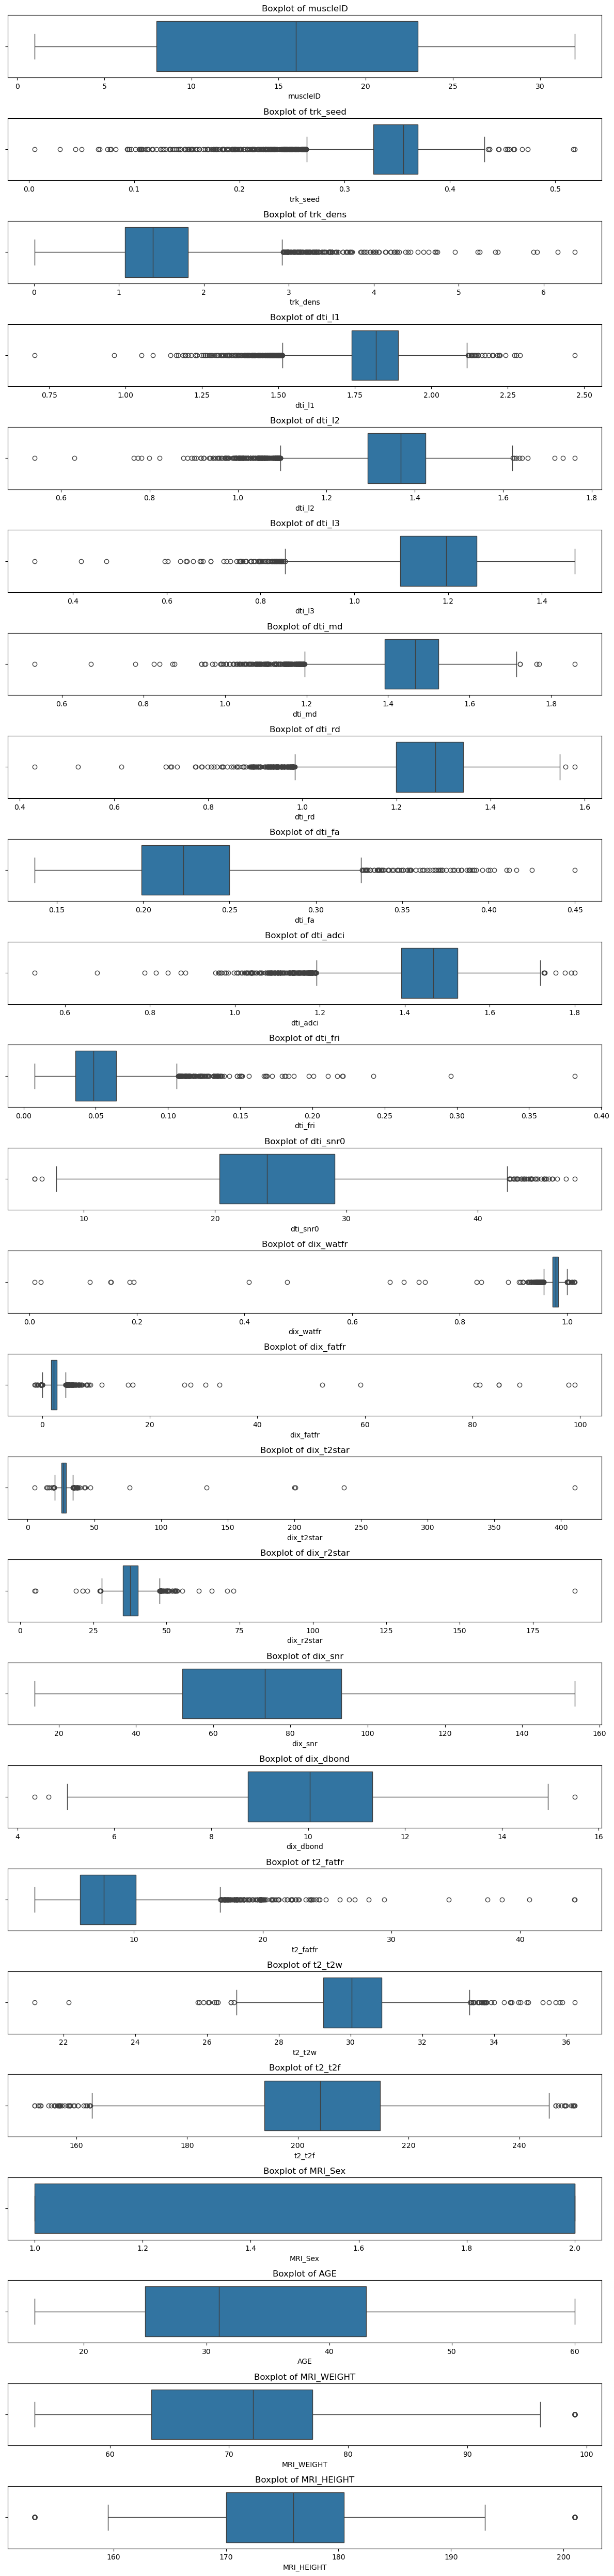

In [6]:
# subplot voor elke feature 
plt.figure(figsize=(12, len(df.columns) * 2))

for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [7]:
# isolation forest voor verwijderen outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% van de data wordt beschouwd als outliers

# Het model trainen op de data
iso_forest.fit(df)

# Voorspel of de data een outlier is (-1 voor outliers, 1 voor normale punten)
outlier_predictions = iso_forest.predict(df)

# Outliers identificeren
df['is_outlier'] = outlier_predictions

# Rijen zonder outliers (waar 'is_outlier' == 1)
df_cleaned_isolation_forest = df[df['is_outlier'] == 1].drop(columns=['is_outlier'])

# Output van de oorspronkelijke en opgeschoonde datasetvorm
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned_isolation_forest.shape}")

# Toon de eerste paar rijen van de opgeschoonde dataset
print(df_cleaned_isolation_forest.head())


# determining the name of the file
file_name = "C:/Users/20201954/Desktop/data/merged_data_MRI_isolation_forest.xlsx"

# saving the excel
df_cleaned_isolation_forest.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

Original DataFrame shape: (4609, 26)
Cleaned DataFrame shape: (4378, 25)
   muscleID  trk_seed  trk_dens    dti_l1    dti_l2    dti_l3    dti_md  \
0         1  0.363608  1.547397  1.755076  1.296643  1.118196  1.385661   
1         1  0.292484  0.862784  1.674851  1.270722  1.088295  1.333043   
2         2  0.361483  1.201093  1.747564  1.318626  1.200244  1.422549   
3         2  0.356667  1.070751  1.727356  1.307701  1.196663  1.412093   
4         3  0.369861  1.960575  1.778001  1.367932  1.214833  1.457258   

     dti_rd    dti_fa  dti_adci  ...  dix_r2star    dix_snr  dix_dbond  \
0  1.205056  0.218869  1.381021  ...   32.360153  72.005936  11.016443   
1  1.176370  0.219142  1.332976  ...   41.488840  55.315876   8.083123   
2  1.259057  0.205252  1.420225  ...   35.659748  65.425865  10.307537   
3  1.251865  0.203801  1.413748  ...   39.659378  65.230667   7.816146   
4  1.292251  0.195484  1.459163  ...   36.733351  73.749279  10.102497   

    t2_fatfr     t2_t2w      t2

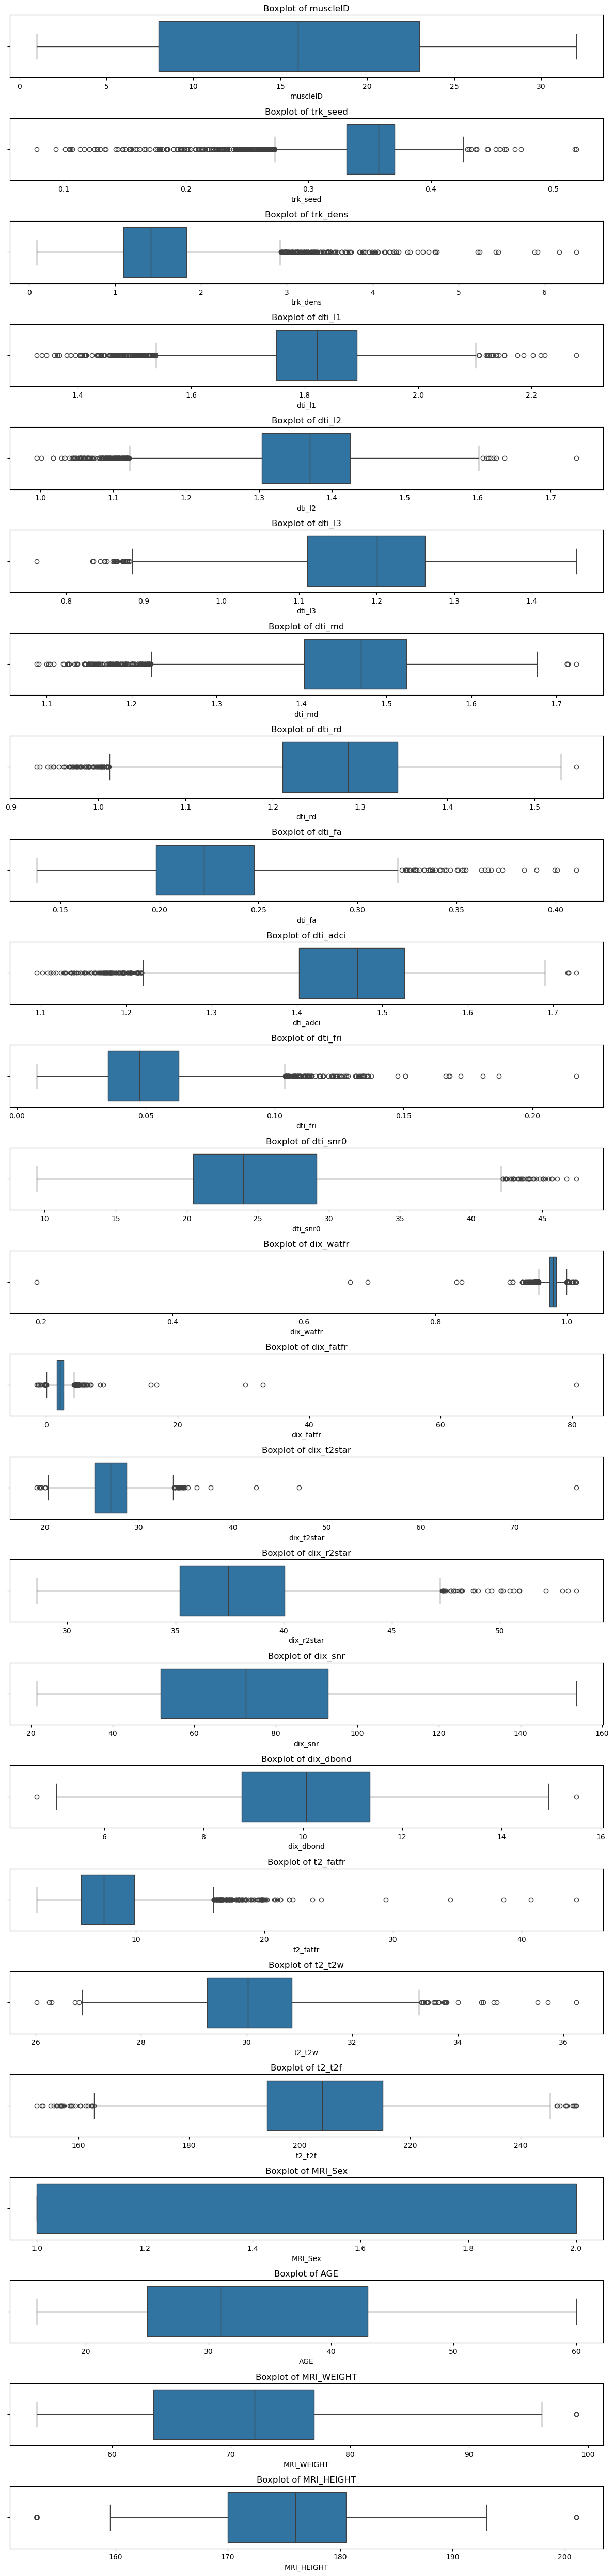

In [8]:
# subplot voor elke feature 
plt.figure(figsize=(12, len(df_cleaned_isolation_forest.columns) * 2))

for i, column in enumerate(df_cleaned_isolation_forest.columns, 1):
    plt.subplot(len(df_cleaned_isolation_forest.columns), 1, i)
    sns.boxplot(x=df_cleaned_isolation_forest[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [9]:
# IQR voor verwijderen outliers
def remove_outliers_iqr(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculate IQR for each column
    IQR = Q3 - Q1
    
    # Filter out rows with outliers
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_out

# Apply the function to remove outliers
df_cleaned_IQR = remove_outliers_iqr(df)

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned_IQR.shape}")

print(df_cleaned_IQR.head())

# determining the name of the file
file_name = "C:/Users/20201954/Desktop/data/merged_data_MRI_IQR.xlsx"

# saving the excel
df_cleaned_IQR.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

Original DataFrame shape: (4609, 26)
Cleaned DataFrame shape: (3432, 26)
    muscleID  trk_seed  trk_dens    dti_l1    dti_l2    dti_l3    dti_md  \
60         1  0.343121  1.313979  1.919622  1.476775  1.303066  1.569240   
61         1  0.367062  1.002553  1.753429  1.377015  1.230139  1.455235   
62         2  0.351226  0.863193  1.780890  1.354294  1.222762  1.454175   
63         2  0.367979  0.845173  1.759555  1.370319  1.245865  1.460356   
64         3  0.368374  1.482058  1.862383  1.437637  1.251652  1.521170   

      dti_rd    dti_fa  dti_adci  ...    dix_snr  dix_dbond   t2_fatfr  \
60  1.393511  0.200168  1.570057  ...  73.993103  10.289599   8.499187   
61  1.303591  0.191172  1.456802  ...  68.236889   8.644874   6.857530   
62  1.288840  0.198995  1.453621  ...  65.518822  10.183369   9.336026   
63  1.307824  0.184866  1.464523  ...  63.076454   8.209738   8.116636   
64  1.343851  0.200980  1.526684  ...  74.137035   9.985139  13.300280   

       t2_t2w      t2_t2f

In [10]:
# bij IQR gaat er veel meer data verloren. 